# Import Libraries

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense, InputLayer
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


# Initialize numpy seed

In [2]:
numpy.random.seed(7)

# Load dataset in pandas dataframe

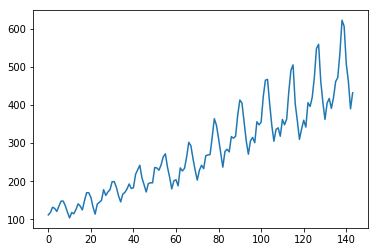

In [3]:
dataframe = pandas.read_csv('./data/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataframe)
plt.show()

# Create Numpy array

In [4]:
dataset = dataframe.values.astype('float32')

# Normalize the values

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Split into train and test sets

In [6]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


# Convert an array of values into a dataset matrix

In [7]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# Create Feature based on last "look_back" occurrences

In [8]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(len(trainX),len(trainY))

92 92


# Reshape input to be [samples, time steps, features]
### There is only 1 time step and there only a vector of length feature is getting passed 

In [9]:
train_X = trainX.reshape(trainX.shape[0], 1, trainX.shape[1])
train_Y = trainY
test_X = testX.reshape(testX.shape[0], 1, testX.shape[1])
test_Y = testY

In [10]:
input_shape = (train_X.shape[1],train_X.shape[2])
num_output = train_Y.shape[0]

# Define the LSTM network

In [11]:
model = Sequential()
model.add(InputLayer(input_shape=input_shape))
model.add(LSTM(units = 100, dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1,activation='linear'))


# Compile and Train the Model

In [12]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_X, train_Y, epochs=100, batch_size=1, verbose=0)

# make predictions

In [13]:
trainPredict = model.predict(train_X)
testPredict = model.predict(test_X)

# invert predictions

In [14]:
trainPredict = scaler.inverse_transform(trainPredict)
train_Y = scaler.inverse_transform([train_Y])
testPredict = scaler.inverse_transform(testPredict)
test_Y = scaler.inverse_transform([test_Y])

# calculate root mean squared error

In [15]:
trainScore = math.sqrt(mean_squared_error(train_Y[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(test_Y[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 31.17 RMSE
Test Score: 91.69 RMSE


# shift train and test predictions for plotting

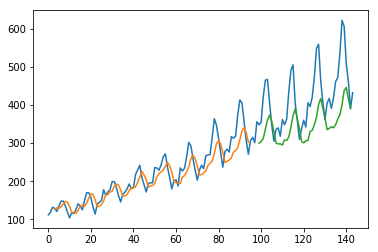

In [16]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Reshape input to be [samples, time steps, features]
### There is total features number of time step and there only a vector of length 1 is getting passed to each RNN cell

In [17]:
train_X = trainX.reshape(trainX.shape[0],trainX.shape[1],1)
train_Y = trainY
test_X = testX.reshape(testX.shape[0], testX.shape[1],1)
test_Y = testY

In [18]:
input_shape = (train_X.shape[1],train_X.shape[2])
num_output = train_Y.shape[0]

# Define the LSTM network

In [19]:
model = Sequential()
model.add(InputLayer(input_shape=input_shape))
model.add(LSTM(units = 100, dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1,activation='linear'))


# Compile and Train the Model

In [20]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_X, train_Y, epochs=100, batch_size=1, verbose=0)

# make predictions

In [21]:
trainPredict = model.predict(train_X)
testPredict = model.predict(test_X)

# invert predictions

In [22]:
trainPredict = scaler.inverse_transform(trainPredict)
train_Y = scaler.inverse_transform([train_Y])
testPredict = scaler.inverse_transform(testPredict)
test_Y = scaler.inverse_transform([test_Y])

# calculate root mean squared error

In [23]:
trainScore = math.sqrt(mean_squared_error(train_Y[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(test_Y[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 33.40 RMSE
Test Score: 95.14 RMSE


# shift train and test predictions for plotting

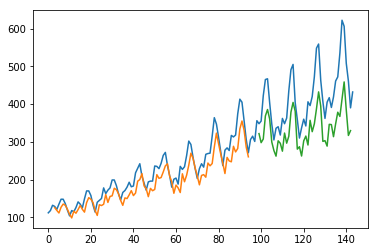

In [24]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()